In [1]:
import os, sys
cur_dir = os.getcwd()
basename = os.path.basename(cur_dir)
for _ in range(5):
    if basename != 'OCLog':
        cur_dir = os.path.dirname(cur_dir)
        basename = os.path.basename(cur_dir)
        #print(cur_dir, basename)
    else:
        if cur_dir not in sys.path:
            sys.path.append(cur_dir)
            #print(sys.path)
import os
from openpyxl import Workbook
from openpyxl import load_workbook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm import trange, tqdm, tnrange
from oclog.BGL.bglv1 import BGLog, get_embedding_layer
from oclog.openset.boundary_loss import euclidean_metric, BoundaryLoss
from oclog.openset.pretrainingV1 import LogLineEncoder, LogSeqEncoder, LogClassifier
# from oclog.openset.openset import OpenSet
from oclog.openset.opensetv9 import OpenSet
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import sklearn.metrics as m
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import TSNE
tf.random.set_seed(1234)
np.random.seed(1234) 

In [2]:
designated_ukc_cls = 5
embedding_size = 12
# num_classes= 3
pt_epochs = 2
ukc_label=7
octrain_epochs = 1
lr_rate = 2.5
wait_patience = 8
optimizer = 'adam'

oset = OpenSet()

In [3]:
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, 
                                                           load_from_pkl=True, ablation=500,
                                                          designated_ukc_cls=5)
# print(oset.tracker)
# oset.train(train_data=train_data, val_data=val_data,
#                                     test_data=test_data, bglog=bglog, manual_color_map=False,                                 
#                                    )

padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 400, val_0:, 50, test_0:, 50, train_1:, 400, val_1:, 50, test_1:, 50, train_2:, 400, val_2:, 50, test_2:, 50, train_3:, 400, val_3:, 50, test_3:, 50, train_4:, 400, val_4:, 50, test_4:, 50, class 5 is added as ukc
ukc_5:, 50
length of train_data - (num_seq_per_cls * num_class)// batch size: 62


got all the dataset
unknown optimizer None. assigning default as adam with lr_rate=2
got all the dataset
got all the dataset
vocab_size: 50
got all the dataset
2022-04-26 19:51:40.224441
starting to create ptmodel automatically
staring pre trining
Epoch 1/2
62/62 [==============================] - ETA: 0s - loss: 0.7233 - accuracy: 0.7077 - precision: 0.8823 - recall: 0.5363
Epoch 1: val_accuracy improved from -inf to 0.87946, saving model to data\ptmodel_2022-04-26_19_51_40.224441\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-26_19_51_40.224441\assets
62/62 [==============================] - 8s 111ms/step - loss: 0.7233 - accuracy: 0.7077 - precision: 0.8823 - recall: 0.5363 - val_loss: 0.3245 - val_accuracy: 0.8795 - val_precision: 0.8991 - val_recall: 0.8750 - lr: 0.0010
Epoch 2/2
62/62 [==============================] - ETA: 0s - loss: 0.1710 - accuracy: 0.9400 - precision: 0.9496 - recall: 0.9304
Epoch 2: val_accuracy improved from 0.87946 to 0.96875, saving model to da

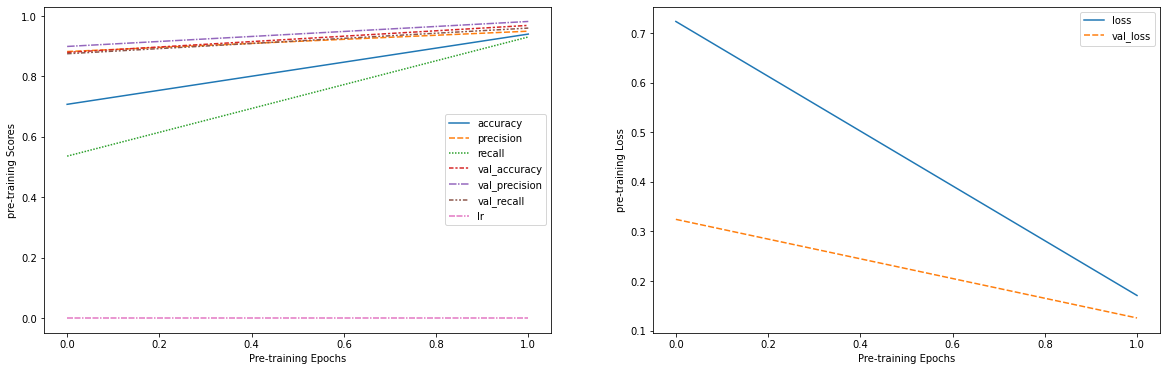

run_id:  2022-04-26_19_51_54.509335_390024ebc56c11ec8594ac8247733f47


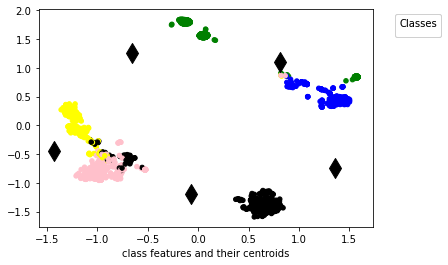

run_id:  2022-04-26_19_52_12.206469_438c833bc56c11ecb136ac8247733f47


100%|██████████████████████████████████████████████████████████████████████████████████| 62/62 [00:08<00:00,  7.43it/s]


epoch: 1/2, train_loss: 2.9589738845825195, F1_train: 0.3123767276215474 F1_val: 0.31037775891341257


100%|██████████████████████████████████████████████████████████████████████████████████| 62/62 [00:08<00:00,  7.16it/s]


epoch: 2/2, train_loss: 2.965147018432617, F1_train: 0.5953649166452449 F1_val: 0.5056726191966794


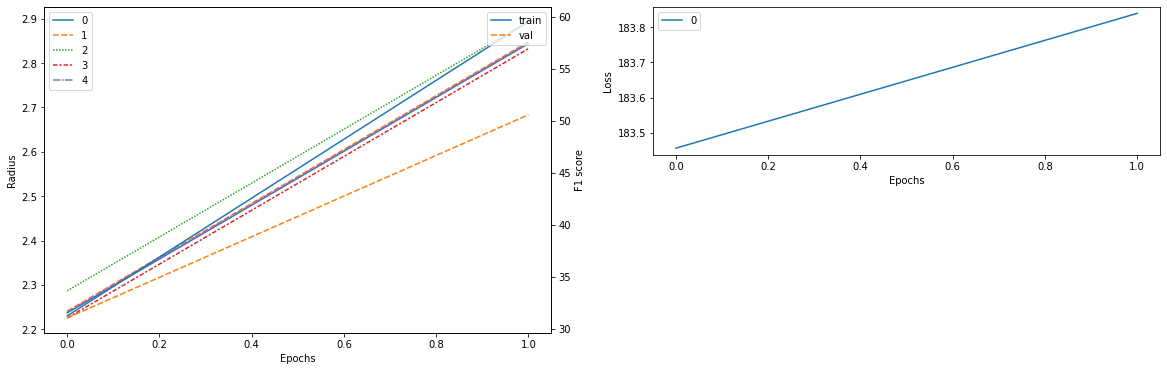

classification report for training:
[[148   0   0   0   0 248]
 [  0  23   0   0   0 373]
 [  0   0 251   0   0 145]
 [  0   0   0 215   0 183]
 [  0   0   0   0 294 104]
 [  0   0   0   0   0   0]]
46.93
f1_weighted: 0.5965558321453385, f1_macro: 0.49682845649518814, f1_micro: 0.4692540322580645, f_measure: {'Known': 59.6194, 'Open': 0, 'F1-score': 49.6828}
              precision    recall  f1-score   support

           0       1.00      0.37      0.54       396
           1       1.00      0.06      0.11       396
           2       1.00      0.63      0.78       396
           3       1.00      0.54      0.70       398
           4       1.00      0.74      0.85       398
           7       0.00      0.00      0.00         0

    accuracy                           0.47      1984
   macro avg       0.83      0.39      0.50      1984
weighted avg       1.00      0.47      0.60      1984

classification report for test data:
[[ 0  0  0  0  0  0 47]
 [ 0  2  0  0  0  0 47]
 [ 0  0 34 

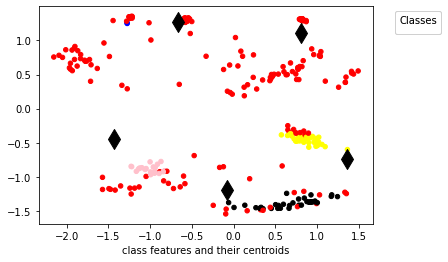

INFO:tensorflow:Assets written to: ram://003fdc61-33b8-43d9-9182-fa2859d0af66/assets


In [4]:
res = oset.train(train_data=train_data, val_data=val_data,
                                    test_data=test_data, bglog=bglog, 
                 manual_color_map=True, centroid_black=True,                               
                                   pt_epochs=2, oc_epochs=2, )

In [5]:
# res = oset.train(train_data=train_data, val_data=val_data,
#                                     test_data=test_data, bglog=bglog, manual_color_map=True,                                 
#                                    pt_epochs=3, oc_epochs=10, ptmodel_get_mode='import',                 
#                 )

In [6]:
# res = oset.train(train_data=train_data, val_data=val_data,
#                                     test_data=test_data, bglog=bglog,                                 
#                                    pt_epochs=3, oc_epochs=10, ptmodel_get_mode='import',  
#                  manual_color_map=False, centroid_class_color=True,
#                 )

In [7]:
# plist = ['bg_class_obj', 'train_data', 'val_data', 'test_data', 'bglog']
# for i in plist:
#     oset.tracker.pop(i)

In [8]:
# s = oset.update_tracker('mytest.xlsx', oset.tracker )

In [9]:
# import pickle
# f = pickle.dumps(oset)